In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [8]:
data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [9]:
data.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [10]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0, 'Diesel':1,'CNG':2})

In [11]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [12]:
#this can also be done using encoding 
data.replace({'Seller_Type' :{'Dealer':0,'Individual':1}},inplace = True)

In [13]:
data.replace({'Transmission' : {'Manual':0,'Automatic':1}},inplace = True)

In [14]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [15]:
#splitting the dataset into data and target
X = data.drop(['Car_Name','Selling_Price'], axis = 1)
Y = data['Selling_Price']

In [16]:
#splitting the dataset into train and test
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state = 2)

In [17]:
#load the linear regression model
linear_reg = LinearRegression()

In [18]:
linear_reg.fit(X_train,Y_train)

LinearRegression()

Evaluting the model

In [19]:
#predicting on training data
training_pred = linear_reg.predict(X_train)

In [20]:
#R sqaured error
error_score = metrics.r2_score(Y_train,training_pred)

In [21]:
error_score

0.8799451660493701

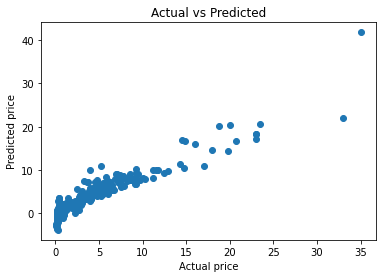

In [22]:
#visulize the actual and predicted prices 
plt.scatter(Y_train,training_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted")
plt.show()

In [23]:
#testing data
testing_pred = linear_reg.predict(X_test)

In [24]:
error_score_test = metrics.r2_score(Y_test,testing_pred)

In [25]:
error_score_test

0.836576671502687

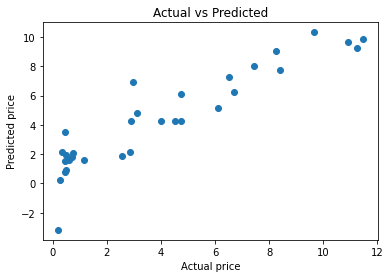

In [26]:
plt.scatter(Y_test,testing_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted")
plt.show()

Lasso Regression 


In [27]:
lasso_model = Lasso()

In [28]:
lasso_model.fit(X_train,Y_train)

Lasso()

In [29]:
training_prediction = lasso_model.predict(X_train)

In [30]:
error_score_lasso = metrics.r2_score(Y_train,training_prediction)

In [31]:
error_score_lasso

0.8427856123435794

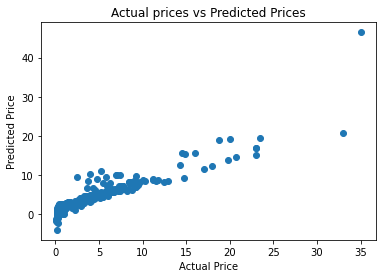

In [32]:
plt.scatter(Y_train,training_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices vs Predicted Prices')
plt.show()

In [33]:
testing_prediction = lasso_model.predict(X_test)

In [34]:
error_score_test_lasso = metrics.r2_score(Y_test,testing_prediction)

In [35]:
error_score_test_lasso

0.8709167941173195

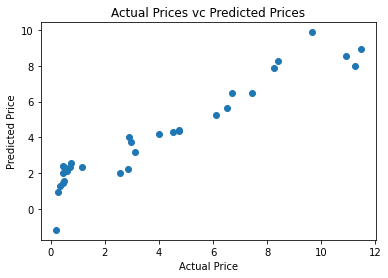

In [36]:
plt.scatter(Y_test,testing_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vc Predicted Prices')
plt.show()

Prediction System for Lasso Regression

In [69]:
input_data = (2017,9.85,6900,0,0,0,0)

array = np.asarray(input_data)

array_reshape = array.reshape(1,-1) #we want to make the prediction for only one value

prediction = lasso_model.predict(array_reshape)

In [70]:
prediction

array([7.16105963])

Prediction System for Linear Regression

In [71]:
input_data = (2017,9.85,6900,0,0,0,0)

array = np.asarray(input_data)

array_reshape = array.reshape(1,-1) #we want to make the prediction for only one value

prediction = linear_reg.predict(array_reshape)

In [72]:
prediction

array([7.07156998])

After comparing both the prediction systems, we can come to the conclusion that Lasso Regression is more accurate than Linear Regression